# Project Name : IMDB Movie Dataset

In [405]:
import pandas as pd
import numpy as np
import requests
import json

 #### Loading the discover data extracted earlier

In [406]:
with open("movie_data.json") as f:
    data = json.load(f)

In [407]:
data

[{'page': 1,
  'results': [{'adult': False,
    'backdrop_path': '/iQFcwSGbZXMkeyKrxbPnwnRo5fl.jpg',
    'genre_ids': [28, 12, 878],
    'id': 634649,
    'original_language': 'en',
    'original_title': 'Spider-Man: No Way Home',
    'overview': 'Peter Parker is unmasked and no longer able to separate his normal life from the high-stakes of being a super-hero. When he asks for help from Doctor Strange the stakes become even more dangerous, forcing him to discover what it truly means to be Spider-Man.',
    'popularity': 5083.954,
    'poster_path': '/1g0dhYtq4irTY1GPXvft6k4YLjm.jpg',
    'release_date': '2021-12-15',
    'title': 'Spider-Man: No Way Home',
    'video': False,
    'vote_average': 8.3,
    'vote_count': 8940},
   {'adult': False,
    'backdrop_path': '/3G1Q5xF40HkUBJXxt2DQgQzKTp5.jpg',
    'genre_ids': [16, 35, 10751, 14],
    'id': 568124,
    'original_language': 'en',
    'original_title': 'Encanto',
    'overview': "The tale of an extraordinary family, the Madrigals

<dt> the data is highly nested with the dictionary embedded in list so we use for loop to loop through the data flatten it <dt>

In [5]:
table = []
for page_data in data[0:200]:
    for results_data in page_data["results"]:
        table.append(results_data)

In [6]:
len(table)

4000

In [7]:
df = pd.DataFrame(table)

In [23]:
discover = df.copy()

In [27]:
discover = discover.drop(columns = ["adult", "backdrop_path", "genre_ids", "video"])

In [28]:
discover

id original_language                           original_title  \
0     634649                en                  Spider-Man: No Way Home   
1     568124                en                                  Encanto   
2     524434                en                                 Eternals   
3     476669                en                           The King's Man   
4     597208                en                          Nightmare Alley   
...      ...               ...                                      ...   
3995  565989                en  LEGO Jurassic World: The Secret Exhibit   
3996  472838                en                                   SPF-18   
3997  669659                en                             Best Sellers   
3998  772173                es                   Los dias que no estuve   
3999  424649                en  Model for Murder: The Centerfold Killer   

                                               overview  popularity  \
0     Peter Parker is unmasked and no longer able to...    5083.954   
1     The tale of an extraordinary family, the Madri...    2402.201   
2     The Eternals are a team of ancient aliens who ...    1537.406   
3     As a collection of history's worst tyrants and...    1895.511   
4     An ambitious carnival man with a talent for ma...    1455.144   
...                                                 ...         ...   
3995  It's 2012, and Simon Masrani has an idea for a...      16.332   
3996  18-year-old Penny Cooper spent years pining fo...      13.808   
3997  A cranky, retired author reluctantly embarks o...      17.000   
3998                                                         15.933   
3999  Supermodels compete for a coveted centerfold s...      12.793   

                           poster_path release_date  \
0     /1g0dhYtq4irTY1GPXvft6k4YLjm.jpg   2021-12-15   
1     /4j0PNHkMr5ax3IA8tjtxcmPU3QT.jpg   2021-11-24   
2     /zByhtBvX99ZiCQhac1sh9d9r6nb.jpg   2021-11-03   
3     /aq4Pwv5Xeuvj6HZKtxyd23e6bE9.jpg   2021-12-22   
4     /680klE0dIreQQOyWKFgNnCAJtws.jpg   2021-12-02   
...                                ...          ...   
3995  /v0hr8LOIpsobvVm7FogxaIg7gLx.jpg   2018-11-25   
3996  /mdsnV8HtJUDhwmCt0IDT0TwLbsz.jpg   2017-09-29   
3997  /ltGLKabCfw3ncCGsQ1aQEvWFCcf.jpg   2021-09-09   
3998  /hoxopHvtpXCd8Uex24jC3pkB8sN.jpg   2021-02-19   
3999  /6Kf49vsaVDdxcXavEeDrulRsrbD.jpg   2016-06-21   

                                        title  vote_average  vote_count  
0                     Spider-Man: No Way Home           8.3        8940  
1                                     Encanto           7.7        5076  
2                                    Eternals           7.2        4726  
3                              The King's Man           7.0        1793  
4                             Nightmare Alley           7.1         952  
...                                       ...           ...         ...  
3995  LEGO Jurassic World: The Secret Exhibit           5.8          34  
3996                                   SPF-18           4.4         974  
3997                             Best Sellers           6.2          45  
3998                   Los dias que no estuve           7.5          28  
3999  Model for Murder: The Centerfold Killer           5.4           8  

[4000 rows x 10 columns]

#### saving the dataframe into json file

In [14]:
df.to_json("table.json", orient="records")

In [ ]:
movie_id =  

In [18]:
movie_id = df["id"]

In [20]:
movieid= []
for id in movie_id:
    movieid.append(id)

In [27]:
type(movieid)

list

##### base url to extract movie data with help of movie id

In [31]:
base_url = 'https://api.themoviedb.org/3/movie/{}?{}'

In [32]:
apikey = 'api_key=0f033cb2d03154f2d386a4cf8d0a8670'

In [33]:
movie_data = []
for movie in movieid:
    url = base_url.format(movie, apikey)
    r = requests.get(url, timeout=20)
    if r.status_code != 200:
        continue
    else:
        data = r.json()
        movie_data.append(data)
        
    

In [34]:
movie_data

[{'adult': False,
  'backdrop_path': '/iQFcwSGbZXMkeyKrxbPnwnRo5fl.jpg',
  'belongs_to_collection': {'id': 531241,
   'name': 'Spider-Man (Avengers) Collection',
   'poster_path': '/nogV4th2P5QWYvQIMiWHj4CFLU9.jpg',
   'backdrop_path': '/AvnqpRwlEaYNVL6wzC4RN94EdSd.jpg'},
  'budget': 200000000,
  'genres': [{'id': 28, 'name': 'Action'},
   {'id': 12, 'name': 'Adventure'},
   {'id': 878, 'name': 'Science Fiction'}],
  'homepage': 'https://www.spidermannowayhome.movie',
  'id': 634649,
  'imdb_id': 'tt10872600',
  'original_language': 'en',
  'original_title': 'Spider-Man: No Way Home',
  'overview': 'Peter Parker is unmasked and no longer able to separate his normal life from the high-stakes of being a super-hero. When he asks for help from Doctor Strange the stakes become even more dangerous, forcing him to discover what it truly means to be Spider-Man.',
  'popularity': 4995.766,
  'poster_path': '/1g0dhYtq4irTY1GPXvft6k4YLjm.jpg',
  'production_companies': [{'id': 420,
    'logo_path

##### saving the data in json file

In [35]:
with open("moviesid.json", "w") as write_file:
    json.dump(movie_data, write_file)

In [339]:
with open("moviesid.json") as f:
    movie_data = json.load(f)

In [340]:
df2 = pd.DataFrame(movie_data)

In [341]:
movies = df2.copy()


######  droping columns irrelevant columns from movies dataframe

In [342]:
movies = movies.drop(columns= ["adult", "backdrop_path","imdb_id"])

In [343]:
movies = movies.drop(columns = ["video", "spoken_languages"])

In [344]:
movies = movies.drop(columns = "homepage")

In [345]:
movies = movies.drop(columns = 'original_title')

In [346]:
movies.head(2)

belongs_to_collection     budget  \
0  {'id': 531241, 'name': 'Spider-Man (Avengers) ...  200000000   
1                                               None   50000000   

                                              genres      id  \
0  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  634649   
1  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  568124   

  original_language                                           overview  \
0                en  Peter Parker is unmasked and no longer able to...   
1                en  The tale of an extraordinary family, the Madri...   

   popularity                       poster_path  \
0    4995.766  /1g0dhYtq4irTY1GPXvft6k4YLjm.jpg   
1    2291.508  /4j0PNHkMr5ax3IA8tjtxcmPU3QT.jpg   

                                production_companies  \
0  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
1  [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   

                                production_countries release_date     revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2021-12-15  1866488233   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2021-11-24   240000000   

   runtime    status                                            tagline  \
0    148.0  Released                          The Multiverse unleashed.   
1    102.0  Released  There's a little magic in all of us ...almost ...   

                     title  vote_average  vote_count  
0  Spider-Man: No Way Home           8.3        9020  
1                  Encanto           7.7        5118

##### flattening the nested data from columns 

In [347]:
movies.belongs_to_collection = movies.belongs_to_collection.apply(lambda x: x['name'] if isinstance(x ,dict) else np.nan)
#function checks if the element belong to dict object type and retrives value associated with key() from each element

In [348]:
movies.genres = movies.genres.apply(lambda x: '|'.join(i['name'] for i in x))
#function loops though each element and extracts the value from it and joins them with pipe  

In [349]:
movies.production_companies = movies.production_companies.apply(lambda x: '|'.join(i['name'] for i in x))
# some of the movies have multiple production companies. so we use pipe symbol to seperate them

###### there are 172 rows with empty string so we replace it with NAN 

In [350]:
movies.production_companies.value_counts().head(20)

                                                     172
DreamWorks Animation                                  25
Marvel Studios                                        23
Warner Bros. Animation                                18
The Asylum                                            11
Toho                                                   9
Toei Animation                                         9
Mattel Playground Productions                          9
Universal 1440 Entertainment                           8
Pixar|Walt Disney Pictures                             8
Walt Disney Pictures|Pixar                             8
Universal Pictures                                     7
Illumination Entertainment|Universal Pictures          7
Warner Bros. Animation|DC Entertainment|DC Comics      7
WWE Studios                                            7
Cartoon Network Studios                                7
Disney Channel                                         7
Columbia Pictures|Sony Pictures

In [351]:
movies.production_companies.replace("", np.nan, inplace=True)

In [352]:
 movies.production_countries = movies.production_countries.apply(lambda x: '|'.join(i['name'] for i in x))

In [353]:
movies.production_countries.value_counts().head(20)

United States of America                   1821
Japan                                       292
United Kingdom|United States of America     140
United Kingdom                               94
Canada|United States of America              91
                                             85
South Korea                                  82
Spain                                        73
Canada                                       71
France                                       65
Mexico                                       53
China                                        41
Russia                                       34
China|United States of America               29
Germany                                      25
Brazil                                       23
Italy                                        22
Australia|United States of America           21
China|Hong Kong                              20
United States of America|United Kingdom      20
Name: production_countries, dtype: int64

In [354]:
movies.production_countries.replace("", np.nan, inplace = True)
# replacing empty string with NAN

In [355]:
movies.head(20)

belongs_to_collection     budget  \
0          Spider-Man (Avengers) Collection  200000000   
1                                       NaN   50000000   
2                                       NaN  200000000   
3                                       NaN  100000000   
4                                       NaN   60000000   
5               My Hero Academia Collection          0   
6                     Red Notice Collection  160000000   
7                           Sing Collection   85000000   
8                          Venom Collection  110000000   
9                     The Matrix Collection  190000000   
10                                      NaN          0   
11                                      NaN   40000000   
12                  Ghostbusters Collection   75000000   
13                                      NaN  100000000   
14                             Demon Slayer   15800000   
15                     Shang-Chi Collection  150000000   
16                                      NaN          0   
17  The Seven Deadly Sins Collection - Saga          0   
18                                      NaN    9100000   
19                                      NaN   64000000   

                                genres      id original_language  \
0     Action|Adventure|Science Fiction  634649                en   
1      Animation|Comedy|Family|Fantasy  568124                en   
2                      Science Fiction  524434                en   
3        Action|Adventure|Thriller|War  476669                en   
4                 Crime|Drama|Thriller  597208                en   
5   Animation|Action|Fantasy|Adventure  768744                ja   
6         Action|Comedy|Crime|Thriller  512195                en   
7        Animation|Comedy|Family|Music  438695                en   
8     Science Fiction|Action|Adventure  580489                en   
9     Science Fiction|Action|Adventure  624860                en   
10                     Action|Thriller  860623                en   
11       Horror|Action|Science Fiction  460458                en   
12            Fantasy|Comedy|Adventure  425909                en   
13                 Drama|Romance|Crime  511809                en   
14  Animation|Action|Adventure|Fantasy  635302                ja   
15            Action|Adventure|Fantasy  566525                en   
16                              Action  811592                en   
17                   Animation|Fantasy  843241                ja   
18             Drama|History|Adventure  589761                ru   
19     Family|Adventure|Comedy|Fantasy  585245                en   

                                             overview  popularity  \
0   Peter Parker is unmasked and no longer able to...    4995.766   
1   The tale of an extraordinary family, the Madri...    2291.508   
2   The Eternals are a team of ancient aliens who ...    1516.060   
3   As a collection of history's worst tyrants and...    1794.920   
4   An ambitious carnival man with a talent for ma...    1414.915   
5   A mysterious group called Humarize strongly be...    1421.697   
6   An Interpol-issued Red Notice is a global aler...    1092.482   
7   Buster and his new cast now have their sights ...    1026.826   
8   After finding a host body in investigative rep...     996.709   
9   Plagued by strange memories, Neo's life takes ...     902.629   
10  After civilization succumbs to a deadly pandem...     883.174   
11  Once the booming home of pharmaceutical giant ...     827.791   
12  When a single mom and her two kids arrive in a...     821.995   
13  Two youngsters from rival New York City gangs ...     709.884   
14  Tanjirō Kamado, joined with Inosuke Hashibira,...     849.085   
15  Shang-Chi must confront the past he thought he...     724.077   
16  An elite squad of Navy SEALs, on a covert miss...     613.737   
17  With the help of the "Dragon Sin of Wrath" Mel...     608.055   
18  The aftermath of a shocking explosion at the C...     561.0

### 

### Descriptive analysis or Univariate Analysis

<dt> Analyzing the datatypes of columns <dt>
                                        

In [356]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  1013 non-null   object 
 1   budget                 4000 non-null   int64  
 2   genres                 4000 non-null   object 
 3   id                     4000 non-null   int64  
 4   original_language      4000 non-null   object 
 5   overview               4000 non-null   object 
 6   popularity             4000 non-null   float64
 7   poster_path            3999 non-null   object 
 8   production_companies   3828 non-null   object 
 9   production_countries   3915 non-null   object 
 10  release_date           4000 non-null   object 
 11  revenue                4000 non-null   int64  
 12  runtime                3999 non-null   float64
 13  status                 4000 non-null   object 
 14  tagline                4000 non-null   object 
 15  titl

In [357]:
movies.release_date.head(2)

0    2021-12-15
1    2021-11-24
Name: release_date, dtype: object

<dt> Issues <dt>

<dd> 1. datatype of `release_date` column should be datetime datatype and not mixed <dd>

In [358]:
movies.release_date = pd.to_datetime(movies.release_date)

<dt> Identifying missing values and cleaing columns with Numerical Datatypes <dt>


In [359]:
movies.belongs_to_collection.value_counts(dropna= False).head(20)

NaN                                           2987
Monster High Collection                         10
Doraemon Collection                              8
LEGO DC Comics Super Heroes Collection           7
Tinker Bell Collection                           6
Paranormal Activity Collection                   6
Rurouni Kenshin (Live-Action) Collection         5
Naruto Collection                                5
The Purge Collection                             5
Department Q Collection                          5
Madea Collection                                 5
V/H/S Collection                                 4
Diary of a Wimpy Kid Collection                  4
Ghost In The Shell: Arise Collection             4
My Little Pony: Equestria Girls Collection       4
Insidious Collection                             4
The Trip - Collection                            4
Detective Conan Collection                       4
Son of Batman Collection                         4
The Hunger Games Collection    

In [360]:
movies.budget.value_counts().head(10)

0           2132
20000000      83
10000000      71
30000000      71
40000000      63
25000000      57
5000000       54
50000000      46
15000000      41
35000000      41
Name: budget, dtype: int64

In [361]:
movies.revenue.value_counts().head(10)

0            2034
30000000        4
2000000         3
19000000        2
150000000       2
76196538        2
1000000         2
8000000         2
4100000         2
64780213        2
Name: revenue, dtype: int64

<dt> Issue: <dt>
<dd> 1. `budget` column as 2132 rows with zero value, which seems unusual for movies to have zero budget <dd>
<dd> 2. `revenue` column as 2034 rows with zero value <dd>
<dd> 3. so we convert the rows with zero to a NAN <dd>

In [362]:
movies.budget.replace(0, np.nan, inplace=True)

<dd> * we divide the budget and revenue column by 1 million to show the amounts in millions <dd>

In [363]:
movies.budget = movies.budget.div(1)

In [364]:
movies.budget.head(20)

0     200000000.0
1      50000000.0
2     200000000.0
3     100000000.0
4      60000000.0
5             NaN
6     160000000.0
7      85000000.0
8     110000000.0
9     190000000.0
10            NaN
11     40000000.0
12     75000000.0
13    100000000.0
14     15800000.0
15    150000000.0
16            NaN
17            NaN
18      9100000.0
19     64000000.0
Name: budget, dtype: float64

In [365]:
movies.revenue.value_counts(dropna=False).head(5)

0            2034
30000000        4
2000000         3
19000000        2
150000000       2
Name: revenue, dtype: int64

In [366]:
movies.revenue.replace(0, np.nan, inplace = True)

In [367]:
movies.revenue

0       1.866488e+09
1       2.400000e+08
2       4.020276e+08
3       1.240052e+08
4       3.681675e+07
            ...     
3995             NaN
3996             NaN
3997             NaN
3998             NaN
3999             NaN
Name: revenue, Length: 4000, dtype: float64

<dt> Identifying missing values and Cleaning the columns with String Datatype <dt>

In [368]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  1013 non-null   object        
 1   budget                 1868 non-null   float64       
 2   genres                 4000 non-null   object        
 3   id                     4000 non-null   int64         
 4   original_language      4000 non-null   object        
 5   overview               4000 non-null   object        
 6   popularity             4000 non-null   float64       
 7   poster_path            3999 non-null   object        
 8   production_companies   3828 non-null   object        
 9   production_countries   3915 non-null   object        
 10  release_date           4000 non-null   datetime64[ns]
 11  revenue                1966 non-null   float64       
 12  runtime                3999 non-null   float64       
 13  sta

In [369]:
movies.genres.value_counts().head(40)

Drama                               179
Comedy                              165
Horror                               97
Horror|Thriller                      79
Drama|Romance                        77
Comedy|Romance                       65
Documentary                          61
Action|Thriller                      59
Thriller                             50
Romance|Drama                        49
Comedy|Drama                         47
Action                               46
Drama|History                        41
Thriller|Horror                      39
Romance|Comedy                       38
Action|Crime|Thriller                38
Animation|Family                     37
Drama|Thriller                       37
Action|Adventure|Science Fiction     30
Comedy|Drama|Romance                 27
Action|Adventure|Fantasy             26
Drama|Comedy                         25
Horror|Thriller|Mystery              24
Crime|Drama|Thriller                 24
Action|Comedy                        23


<dt> Findings <dt>
<dd>1. In 'genres' column there are 18 rows with empty strings<dd> 
<dd> Since they are equivalent to missing values,we will convert those rows into NAN <dd>

In [370]:
movies.genres.replace('', np.nan, inplace=True)

In [371]:
movies.original_language.value_counts(dropna=False).head(20)

en    2981
ja     307
es     204
fr      90
ko      89
zh      64
ru      40
de      29
pt      27
it      23
da      18
no      17
cn      16
id      12
hi      12
pl      11
nl      11
tr      10
th       8
sv       6
Name: original_language, dtype: int64

In [372]:
movies.overview.value_counts(dropna=False).head(5)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                26
The Kingdom of the People of the Earth once ruled over the land, but now all that remains is the Sword of the Earth. in the city of Eindoak. Satoshi, Iris, and Dent arrive in Eindoak during a harvest festival's Pokémon Tournament and meet the legendary Pokémon Victini who wishes to share its powers of victory to someone. Elsewhere in the city, a descendant of the People 

In [373]:
movies.overview.value_counts(dropna=False).head(1)

    26
Name: overview, dtype: int64

<dt> Findings <dt>
<dd> 1. We can see that there 26 rows with empty strings <dd>
<dd> we will replace those with NAN values <dd>

<dd> 2. We can notice that atleast there are two duplicates, we will deal with that later <dd>

In [374]:
movies.overview.replace('', np.nan, inplace=True)

In [375]:
movies.overview.value_counts(dropna=False).head(5)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             26
The Kingdom of the People of the Earth once ruled over the land, but now all that remains is the Sword of the Earth. in the city of Eindoak. Satoshi, Iris, and Dent arrive in Eindoak during a harvest festival's Pokémon Tournament and meet the legendary Pokémon Victini who wishes to share its powers of victory to someone. Elsewhere in the city, a descendant of the People 

In [376]:
movies.tagline.value_counts(dropna=False).head(10)

                                                                       1269
You never forget your first love.                                         2
Based on a true story                                                     2
A hero must choose: the power of ideals... or the courage of truth?       2
Find your voice.                                                          2
Find your way home.                                                       2
What could go wrong?                                                      2
Long live the king.                                                       2
Evil will rise.                                                           2
The crime that shocked the country.                                       2
Name: tagline, dtype: int64

<dt> Findings <dt>
<dd> tagline column as empty string in 1269 rows, we replace them with NAN values <dd>


In [377]:
movies.tagline.replace('', np.nan, inplace=True)

### Removing duplicates

<dd> we check the duplicate for columns with DataFrame duplicated() method and then filter the duplicates <dd>

In [378]:
#check for duplicates in movies dataset
sum(movies.duplicated())


0

<dt>one first glance there is no indication of duplicates<dt>

In [379]:
# so we tried to look for duplicates by 'id' since id is unique for each movie
movies[movies["id"].duplicated() == True]

Empty DataFrame
Columns: [belongs_to_collection, budget, genres, id, original_language, overview, popularity, poster_path, production_companies, production_countries, release_date, revenue, runtime, status, tagline, title, vote_average, vote_count]
Index: []

<dt> seems like there are no duplicates in this movies dataset <dt>

In [380]:
movies.id.nunique()

4000

### Handling missing values and Removing Rows 

In [381]:
#To get the total number of missing values for each column
movies.isnull().sum()

belongs_to_collection    2987
budget                   2132
genres                     18
id                          0
original_language           0
overview                   26
popularity                  0
poster_path                 1
production_companies      172
production_countries       85
release_date                0
revenue                  2034
runtime                     1
status                      0
tagline                  1269
title                       0
vote_average                0
vote_count                  0
dtype: int64

In [382]:
#checking the number of missing values for each movie
movies.notna().sum(axis = 1).value_counts().sort_values(ascending = False)

17    1105
15     972
16     699
14     617
18     450
13     115
12      33
11       7
10       2
dtype: int64

In [383]:
movies[movies.notna().sum(axis=1)==11]

belongs_to_collection  budget            genres      id  \
362                    NaN     NaN               NaN  748501   
865                    NaN     NaN  Family|Animation  880009   
1695                   NaN     NaN               NaN  204450   
1729                   NaN     NaN               NaN  499464   
2336                   NaN     NaN               NaN  923049   
2464                   NaN     NaN               NaN  532142   
3057                   NaN     NaN               NaN  470581   

     original_language                                           overview  \
362                 ko  Yoon Bong receives a breakup notice from his w...   
865                 es                                                NaN   
1695                de  Experience the hot lovemaking beautiful women ...   
1729                en  Can the dynamic duo resolve their differences ...   
2336                en  With the help of her daughter and a mute serva...   
2464                ja  Cobra and Naomi are working under cover and in...   
3057                es                                                NaN   

      popularity                       poster_path production_companies  \
362       72.929  /bn27bnwcujuCP5q4cyfNsMGvXqg.jpg                  NaN   
865       47.120  /siGmPNbxKdooHm7unHpiBSdfYpR.jpg                  NaN   
1695      34.701  /tACHYHUsX5fPnfVEEpyqpiBfkL0.jpg                  NaN   
1729      35.100  /23j8xF17MkNNCYHzb4CuatWspbp.jpg                  NaN   
2336      20.408   /qKxyQlDqmJF9zbcdpldyCIvCia.jpg                  NaN   
2464      26.246  /r5B6wrcsDEomFJj9P0vR6tx4wfA.jpg                  NaN   
3057      25.088  /ugmcFAJA9KIkq2sNlH1eqLqoA8B.jpg                  NaN   

     production_countries release_date  revenue  runtime    status tagline  \
362                   NaN   2020-09-04      NaN     70.0  Released     NaN   
865                   NaN   2021-10-01      NaN      0.0  Released     NaN   
1695                  NaN   2012-01-08      NaN     61.0  Released     NaN   
1729                  NaN   2015-04-02      NaN      0.0  Released     NaN   
2336                  NaN   2021-12-09      NaN      0.0  Released     NaN   
2464                  NaN   2018-09-08      NaN     15.0  Released     NaN   
3057                Spain   2016-04-19      NaN      0.0  Released     NaN   

                                             title  vote_average  vote_count  
362                                 Hot Hair Salon           2.0           1  
865   Catalina la Catrina: especial Día de Muertos           4.8           7  
1695                                  Lesbian Love           8.2          21  
1729                            Gay Batman Forever           2.0           1  
2336                          The Medium - Menotti           1.5           2  
2464                               CRYING FREE SEX           7.1          13  
3057                                   Oro y Polvo           5.8           3

<dt> Since there are not many missing values for a particular movie and all the information present seems useful we wont make any changes<dt>

In [384]:
#dropping status column since all the values are "released"
movies.drop(columns = "status", inplace=True)

<dt> Setting the Columns in order <dt>

In [385]:
col = ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 'original_language', 'budget', 'revenue', 'production_companies', 'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'poster_path']

In [386]:
#creating a new dataframe with reordered column
movies = movies.loc[:, col] 


In [387]:
movies.head(3)

id                    title  \
0  634649  Spider-Man: No Way Home   
1  568124                  Encanto   
2  524434                 Eternals   

                                             tagline release_date  \
0                          The Multiverse unleashed.   2021-12-15   
1  There's a little magic in all of us ...almost ...   2021-11-24   
2                                In the beginning...   2021-11-03   

                             genres             belongs_to_collection  \
0  Action|Adventure|Science Fiction  Spider-Man (Avengers) Collection   
1   Animation|Comedy|Family|Fantasy                               NaN   
2                   Science Fiction                               NaN   

  original_language       budget       revenue  \
0                en  200000000.0  1.866488e+09   
1                en   50000000.0  2.400000e+08   
2                en  200000000.0  4.020276e+08   

                                production_companies  \
0   Marvel Studios|Pascal Pictures|Columbia Pictures   
1  Walt Disney Animation Studios|Walt Disney Pict...   
2                                     Marvel Studios   

       production_countries  vote_count  vote_average  popularity  runtime  \
0  United States of America        9020           8.3    4995.766    148.0   
1  United States of America        5118           7.7    2291.508    102.0   
2  United States of America        4747           7.2    1516.060    156.0   

                                            overview  \
0  Peter Parker is unmasked and no longer able to...   
1  The tale of an extraordinary family, the Madri...   
2  The Eternals are a team of ancient aliens who ...   

                        poster_path  
0  /1g0dhYtq4irTY1GPXvft6k4YLjm.jpg  
1  /4j0PNHkMr5ax3IA8tjtxcmPU3QT.jpg  
2  /bcCBq9N1EMo3daNIjWJ8kYvrQm6.jpg

In [388]:
#poster path column just has the fragment of the url for the poster image
movies.poster_path[0]

'/1g0dhYtq4irTY1GPXvft6k4YLjm.jpg'

In [389]:
#we create the complete url using the base url and the html tag<img>
basic_url = 'http://image.tmdb.org/t/p/w185/'
movies.poster_path = "<img src='" + basic_url + movies.poster_path + "' style='height:100px;'>"


In [390]:
movies.poster_path[0]

"<img src='http://image.tmdb.org/t/p/w185//1g0dhYtq4irTY1GPXvft6k4YLjm.jpg' style='height:100px;'>"

## Exploratory Data Analysis

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **poster_path:** The URL of the poster image.

In [391]:
movies.describe()

id        budget       revenue   vote_count  vote_average  \
count    4000.000000  1.868000e+03  1.966000e+03   4000.00000   4000.000000   
mean   396286.470500  4.696035e+07  1.418372e+08   1657.54525      6.509300   
std    233248.811941  5.584554e+07  2.466614e+08   3031.17990      0.967943   
min       189.000000  8.900000e+01  3.153000e+03      0.00000      0.000000   
25%    210837.250000  1.000000e+07  8.740514e+06    119.00000      6.000000   
50%    399171.500000  2.500000e+07  4.789049e+07    447.50000      6.600000   
75%    564445.250000  6.000000e+07  1.574769e+08   1718.25000      7.200000   
max    943491.000000  3.800000e+08  2.797801e+09  31082.00000     10.000000   

        popularity      runtime  
count  4000.000000  3999.000000  
mean     54.082405    99.221555  
std     118.574368    25.618237  
min       7.896000     0.000000  
25%      22.239250    90.000000  
50%      30.860000   100.000000  
75%      53.313250   113.000000  
max    4995.766000   247.000000

#### Visulazing the frequency distribution of each columns with histogram

In [392]:
#we import matplolib
import matplotlib.pyplot as plt

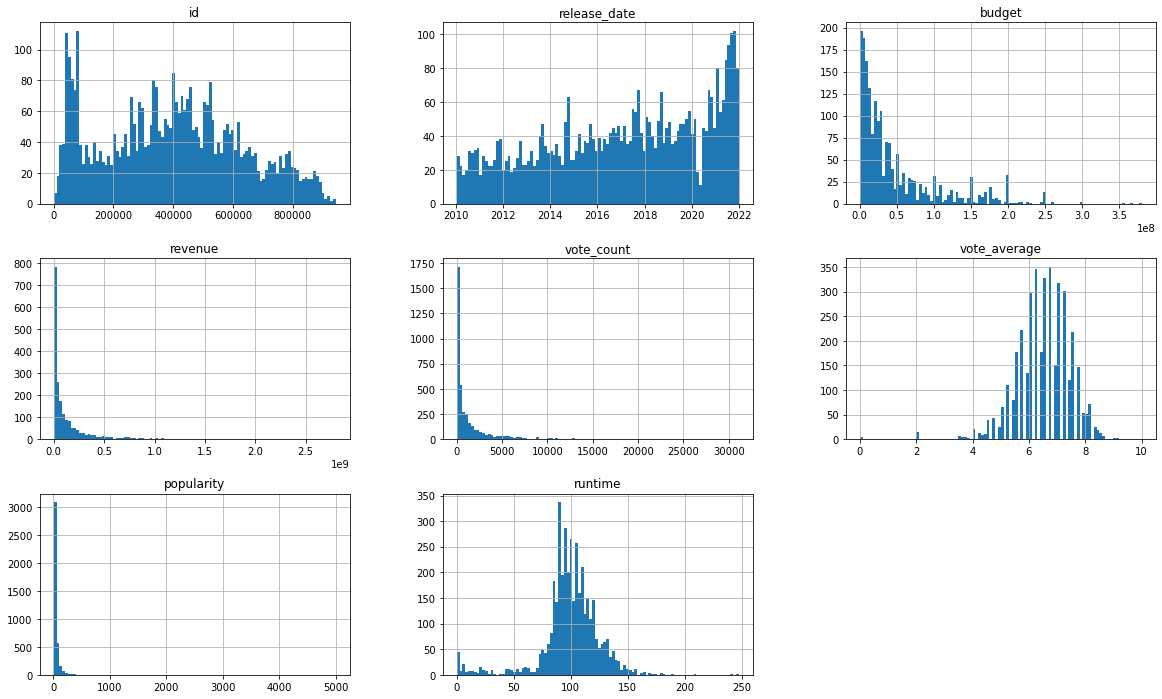

In [393]:
movies.hist(figsize = (20,12), bins=100 )
plt.show()

<dd> 1. as per this data years 2020 to 2022 to highest <dd>
<dd> 2. budget for the movies is right skewed and the frequency is concentrated around 0.5 to 1 million mark <dd>
<dd> 3. average rating of the most movies are centred around mean 6.5 <dd>
<dd> 4. run time duration for the most movies is between one and half to 2 hours. <dd>

### Exploring the Best and the Worst Movies in this Dataset in Terms of the below criteria

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

In [394]:
# we will create a new dataframe with appropriate columns for the above analysis
movies_best = movies[['title', 'poster_path', 'budget', 'revenue', 'popularity', 'vote_average', 'vote_count']].copy()
movies_best


title  \
0                     Spider-Man: No Way Home   
1                                     Encanto   
2                                    Eternals   
3                              The King's Man   
4                             Nightmare Alley   
...                                       ...   
3995  LEGO Jurassic World: The Secret Exhibit   
3996                                   SPF-18   
3997                             Best Sellers   
3998                   Los dias que no estuve   
3999  Model for Murder: The Centerfold Killer   

                                            poster_path       budget  \
0     <img src='http://image.tmdb.org/t/p/w185//1g0d...  200000000.0   
1     <img src='http://image.tmdb.org/t/p/w185//4j0P...   50000000.0   
2     <img src='http://image.tmdb.org/t/p/w185//bcCB...  200000000.0   
3     <img src='http://image.tmdb.org/t/p/w185//aq4P...  100000000.0   
4     <img src='http://image.tmdb.org/t/p/w185//680k...   60000000.0   
...                                                 ...          ...   
3995  <img src='http://image.tmdb.org/t/p/w185//v0hr...          NaN   
3996  <img src='http://image.tmdb.org/t/p/w185//mdsn...          NaN   
3997  <img src='http://image.tmdb.org/t/p/w185//ltGL...          NaN   
3998  <img src='http://image.tmdb.org/t/p/w185//hoxo...          NaN   
3999  <img src='http://image.tmdb.org/t/p/w185//6Kf4...          NaN   

           revenue  popularity  vote_average  vote_count  
0     1.866488e+09    4995.766           8.3        9020  
1     2.400000e+08    2291.508           7.7        5118  
2     4.020276e+08    1516.060           7.2        4747  
3     1.240052e+08    1794.920           7.0        1819  
4     3.681675e+07    1414.915           7.1         960  
...            ...         ...           ...         ...  
3995           NaN      16.734           5.8          34  
3996           NaN      16.331           4.4         974  
3997           NaN      16.253           6.2          45  
3998           NaN      18.778           7.5          28  
3999           NaN      15.167           5.4           8  

[4000 rows x 7 columns]

<dt> formula to find the profit and return on investment <dt>

In [395]:
movies_best['profit'] = movies.revenue.sub(movies.budget)
movies_best['return_on_investment'] = movies.revenue.div(movies.budget)

In [396]:
movies_best

title  \
0                     Spider-Man: No Way Home   
1                                     Encanto   
2                                    Eternals   
3                              The King's Man   
4                             Nightmare Alley   
...                                       ...   
3995  LEGO Jurassic World: The Secret Exhibit   
3996                                   SPF-18   
3997                             Best Sellers   
3998                   Los dias que no estuve   
3999  Model for Murder: The Centerfold Killer   

                                            poster_path       budget  \
0     <img src='http://image.tmdb.org/t/p/w185//1g0d...  200000000.0   
1     <img src='http://image.tmdb.org/t/p/w185//4j0P...   50000000.0   
2     <img src='http://image.tmdb.org/t/p/w185//bcCB...  200000000.0   
3     <img src='http://image.tmdb.org/t/p/w185//aq4P...  100000000.0   
4     <img src='http://image.tmdb.org/t/p/w185//680k...   60000000.0   
...                                                 ...          ...   
3995  <img src='http://image.tmdb.org/t/p/w185//v0hr...          NaN   
3996  <img src='http://image.tmdb.org/t/p/w185//mdsn...          NaN   
3997  <img src='http://image.tmdb.org/t/p/w185//ltGL...          NaN   
3998  <img src='http://image.tmdb.org/t/p/w185//hoxo...          NaN   
3999  <img src='http://image.tmdb.org/t/p/w185//6Kf4...          NaN   

           revenue  popularity  vote_average  vote_count        profit  \
0     1.866488e+09    4995.766           8.3        9020  1.666488e+09   
1     2.400000e+08    2291.508           7.7        5118  1.900000e+08   
2     4.020276e+08    1516.060           7.2        4747  2.020276e+08   
3     1.240052e+08    1794.920           7.0        1819  2.400520e+07   
4     3.681675e+07    1414.915           7.1         960 -2.318325e+07   
...            ...         ...           ...         ...           ...   
3995           NaN      16.734           5.8          34           NaN   
3996           NaN      16.331           4.4         974           NaN   
3997           NaN      16.253           6.2          45           NaN   
3998           NaN      18.778           7.5          28           NaN   
3999           NaN      15.167           5.4           8           NaN   

      return_on_investment  
0                 9.332441  
1                 4.800000  
2                 2.010138  
3                 1.240052  
4                 0.613612  
...                    ...  
3995                   NaN  
3996                   NaN  
3997                   NaN  
3998                   NaN  
3999                   NaN  

[4000 rows x 9 columns]

In [397]:
movies_best.set_index('title', inplace=True) #setting movies title column as the index for the dataframe

In [398]:
movies_best

poster_path  \
title                                                                                        
Spider-Man: No Way Home                  <img src='http://image.tmdb.org/t/p/w185//1g0d...   
Encanto                                  <img src='http://image.tmdb.org/t/p/w185//4j0P...   
Eternals                                 <img src='http://image.tmdb.org/t/p/w185//bcCB...   
The King's Man                           <img src='http://image.tmdb.org/t/p/w185//aq4P...   
Nightmare Alley                          <img src='http://image.tmdb.org/t/p/w185//680k...   
...                                                                                    ...   
LEGO Jurassic World: The Secret Exhibit  <img src='http://image.tmdb.org/t/p/w185//v0hr...   
SPF-18                                   <img src='http://image.tmdb.org/t/p/w185//mdsn...   
Best Sellers                             <img src='http://image.tmdb.org/t/p/w185//ltGL...   
Los dias que no estuve                   <img src='http://image.tmdb.org/t/p/w185//hoxo...   
Model for Murder: The Centerfold Killer  <img src='http://image.tmdb.org/t/p/w185//6Kf4...   

                                              budget       revenue  \
title                                                                
Spider-Man: No Way Home                  200000000.0  1.866488e+09   
Encanto                                   50000000.0  2.400000e+08   
Eternals                                 200000000.0  4.020276e+08   
The King's Man                           100000000.0  1.240052e+08   
Nightmare Alley                           60000000.0  3.681675e+07   
...                                              ...           ...   
LEGO Jurassic World: The Secret Exhibit          NaN           NaN   
SPF-18                                           NaN           NaN   
Best Sellers                                     NaN           NaN   
Los dias que no estuve                           NaN           NaN   
Model for Murder: The Centerfold Killer          NaN           NaN   

                                         popularity  vote_average  vote_count  \
title                                                                           
Spider-Man: No Way Home                    4995.766           8.3        9020   
Encanto                                    2291.508           7.7        5118   
Eternals                                   1516.060           7.2        4747   
The King's Man                             1794.920           7.0        1819   
Nightmare Alley                            1414.915           7.1         960   
...                                             ...           ...         ...   
LEGO Jurassic World: The Secret Exhibit      16.734           5.8          34   
SPF-18                                       16.331           4.4         974   
Best Sellers                                 16.253           6.2          45   
Los dias que no estuve                       18.778           7.5          28   
Model for Murder: The Centerfold Killer      15.167           5.4           8   

                                               profit  return_on_investment  
title                                                                        
Spider-Man: No Way Home                  1.666488e+09              9.332441  
Encanto                                  1.900000e+08              4.800000  
Eternals                                 2.020276e+08              2.010138  
The King's Man                           2.400520e+07              1.240052  
Nightmare Alley                         -2.318325e+07              0.613612  
...                                               ...                   ...  
LEGO Jurassic World: The Secret Exhibit           NaN                   NaN  
SPF-18                                            NaN                   NaN  
Best Sellers                                      NaN                   NaN  
Los dias que no estuve           

__Movies Top 5 - Highest Revenue__

In [399]:
subset=movies_best.iloc[:5, :4]

In [400]:
#this will enable to present data in html like format
from IPython.display import HTML

In [401]:
HTML(subset.to_html(escape = False)) #to_html connverts DataFrame into html and HTML() will convert into a website format